# Exploring the Ratings and Reviews of San Diego's Public Parks

# Overview

Local parks often seem to go by unnoticed due to regional parks or state parks that have much more attractions and space. The goal of this report is to examine the relationship between a park's popularity and rating to a park's area of land. In the end, there is a moderate correlation where more acres will lead to more Yelp reviews. In other words, parks with more space will invite more crowds and have an increase in popularity.

# Name & GitHub

- Name: Bryan Nguyen
- GitHub Username: bnguy8310

# Research Question

What is the relationship between the reviews and the popularity of parks in the San Diego area? How does the park size and park type affect crowdedness and ratings of the parks?

## Background and Prior Work

Everytime we think about going to a public park, we think about going to the "better" parks with possible large areas of grass, play structures, basketball courts.<sup>1</sup> This leads to many families and groups of friends all going to the same park which increases the number of people or ratings. Sometimes the local parks lose interest and eventually have no visitors in long periods of time. 

In the San Diego area, there are several types of parks, such as local parks, state parks, or open parks, but it would make more sense that citizens or tourists would go to the parks that are larger and has more park amenities.
   
San Diego has tried to help with the crowdedness problem around Balboa Park which has led to negative backlash.<sup>2</sup> By trying to build a large parking structure, park space and area would be sacrificed. This was clearly not the correct way for the San Diego city to apprach the situation. There are many factors that decide what makes a good or popular public park <sup>3</sup>. We can use this information that has been researched by professionals, which will provide much help due to their expertise.

References:
- 1) https://www.theparkcatalog.com/blog/survey-people-visit-parks-park-bench/
- 2) https://www.sandiegouniontribune.com/opinion/commentary/sdut-utbg-balboa-park-plaza-oppose-2016jul22-htmlstory.html
- 3) https://www.cnu.org/publicsquare/2017/03/01/what-makes-good-public-park

# Hypothesis


I predict that parks with larger space will have much more ratings than other underdeveloped local parks in the city. There are better activities and bigger area for families to come out and play in the large parks because of the city's priority of regional and state parks. People would not likely spend much time at a park that does not offer much fun. All of these reasons would lead to increase of popularity and rating.

# Datasets

### List of Datasets used:
- Dataset Name:Park Locations Data (parks_datasd.geojson)
- Link to the dataset:https://data.sandiego.gov/datasets/park-locations/
- Number of observations: 2769

This dataset consist of properties managed by the City of San Diego Parks & Recreation Department. There are 8 columns/features: `objectid` (identifier), `park name`, `park alias`, `gis_acres` (acres of parks), `park_type`, `location`, `owner`, `geometry`(area coordinates). 

- Dataset Name:Yelp Data for San Diego Parks (yelp_SD_parks.csv)
- Link to the dataset: https://www.yelp.com (Curated by Dr. Shannon Ellis)
- Number of observations: 833

This curated dataset contains all the basic information San Diego parks on yelp. There are 10 columns/features: `name`(park name), `address`, `phone` (phone number), `id` (identifier), `url` (yelp page), `rating` (total avg rating), `review_count`(area coordinates), `longtitude`, `latitude`, `is_closed`.

- Dataset Name:Yelp Data for San Diego Parks (yelp_SD_reviews.csv)
- Link to the dataset:https://www.yelp.com (Curated by Dr. Shannon Ellis)
- Number of observations: 2333

This curated dataset consist of some text reviews of San Diego yelp places. There are 3 columns/features: `name`, `rating`, `text`(full text review).

I plan to join the Park Locations Data with the Yelp data in order to have a single dataframe that has all the relevant information of each park. It will be relatively simple to combine the datasets because each park has a specific name or one alias. The Yelp reviews will then allow me to analyze random responses about specific parks .

# Setup

In [1]:
## Import packages
import numpy as np
import pandas as pd
import geopandas as gpd
import string

import matplotlib.pyplot as plt
## sets parameters for figures
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams.update({'font.size': 10})

import seaborn as sns
sns.set(font_scale = 1.5)

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
from nltk.probability import FreqDist

from wordcloud import WordCloud, STOPWORDS
import patsy
import statsmodels.api as sm

# Data Cleaning

### Step 1: Load in Data
Load in all of the raw data and peek at each data set to see column names and data types

In [2]:
## Load raw data from github repo
parks_data ='https://raw.githubusercontent.com/bnguy8310/individual_fa20/master/data/parks_datasd.geojson'
parks = gpd.read_file(parks_data)

yelp_ratings = 'https://raw.githubusercontent.com/bnguy8310/individual_fa20/master/data/yelp_SD_parks.csv'
ratings = pd.read_csv(yelp_ratings)

yelp_reviews = 'https://raw.githubusercontent.com/bnguy8310/individual_fa20/master/data/yelp_SD_reviews.csv'
reviews = pd.read_csv(yelp_reviews)

In [3]:
parks.head()

,objectid,name,alias,gis_acres,park_type,location,owner,geometry
0,1,South Carlsbad SB,South Carlsbad State Beach,115.895878,State,,State Parks,"MULTIPOLYGON (((-117.31431 33.09015, -117.3142..."
1,2,Torrey Pines SB,Torrey Pines State Beach,67.294309,State,,State Parks,"POLYGON ((-117.26147 32.93883, -117.26181 32.9..."
2,3,Ruocco Park,Ruocco Park,3.312526,Local,"585 Harbor Ln, San Diego. California",SDUPD,"POLYGON ((-117.17298 32.71167, -117.17303 32.7..."
3,4,Tuna Harbor Park,Tuna Harbor Park,0.639035,Local,"700 North Harbor Dr, San Diego. California",SDUPD,"POLYGON ((-117.17260 32.71160, -117.17268 32.7..."
4,5,San Diego Bayfront Park,San Diego Bayfront Park,3.669272,Local,"One Park Boulevard, San Diego. California",SDUPD,"MULTIPOLYGON (((-117.16074 32.70407, -117.1594..."


In [4]:
ratings.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [5]:
reviews.head()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


### Step 2: Keep Relevant Columns/Features
Drop columns of each dataset that are irrelevant to the analysis 

**Note**: The **reviews** dataset is already clean enough for data analysis

In [6]:
## drop columns from each df
parks_clean = parks.drop(columns = ['objectid', 'location', 'owner', 
                              'geometry', 'name']).rename(columns = {'alias': 'name', 'gis_acres': 'acres'})
parks_clean['acres'] = parks_clean['acres'].round(decimals = 2)
ratings_clean = ratings.drop(columns = ['address', 'phone', 'id', 'url', 'longitude', 'latitude', 'is_closed'])

In [7]:
## make sure no null values
print(parks_clean.isnull().values.any())
print(ratings_clean.isnull().values.any())

False
False


In [8]:
parks_clean[(parks_clean['name'] == 'Balboa Park')]

,name,acres,park_type
515,Balboa Park,1089.48,Regional


In [9]:
ratings_clean

,name,rating,review_count
0,Balboa Park,5.0,2105
1,Civita Park,4.5,46
2,Waterfront Park,4.5,242
3,Trolley Barn Park,4.5,102
4,Bay View Park,5.0,42
...,...,...,...
828,Del Cerro - San Diego,4.5,12
829,San Diego Metropolitan Transit System,2.5,268
830,Petco Park,4.0,1667
831,Ann D. L'Heureux Memorial Dog Park,3.0,50


### Step 3: Merge Dataframes
Combine the parks and ratings dataframes to have a single dataframe with all the basic information of each park

**Note**: Merging only the parks and ratings dataframes because the Yelp reviews dataframe has multiple reviews for each park so it is hard to merge to a single park information dataframe.

In [10]:
### Inner-Join the two dataframes
park_info = pd.merge(left = ratings_clean, right = parks_clean, how = 'inner')
park_info

,name,rating,review_count,acres,park_type
0,Balboa Park,5.0,2105,1089.48,Regional
1,Waterfront Park,4.5,242,12.69,Regional
2,Centrum Park,3.5,22,2.16,Local
3,Presidio Park,4.5,85,61.27,Regional
4,Olive Grove Park,4.0,8,9.18,Local
...,...,...,...,...,...
182,Sycamore Canyon Park,4.5,137,7.80,Local
183,La Costa Canyon Park,4.0,16,14.68,Local
184,Carmel Grove Park,3.5,2,2.79,Local
185,Ashley Falls Park,4.5,2,11.66,Local


### Step 4: Split and Prepare Review Data
Prepare Yelp text reviews data to get positive and negative reviews. Also tokenize each review and take out stopwords in each word token.

***Note***: I am making it so that ratings of 3.0 are counted as negative reviews

In [11]:
## make a column of sentiment 
def sentiment(review):
    if review > 3.0:
        return 1.0
    elif review < 3.0:
        return -1.0
    else:
        return -1.0
## remove stopwords from word tokens
def remove_stopwords(lists):
    all_stopwords = sw.words('english')
    all_stopwords.extend(['I', "'s", "n't",'...',"'ve"])
    
    ## add punctuation and single digit numbers to stopwords
    all_stopwords.extend(list(string.punctuation))
    all_stopwords.extend(list(range(10)))
    
    return [word for word in lists if not word in all_stopwords]

reviews['sentiment'] = reviews['rating'].apply(lambda x: sentiment(x))

## word frequency split all the words into lists
reviews['words'] = reviews['text'].apply(lambda x: x.lower())
reviews['words'] = reviews['words'].apply(lambda x: word_tokenize(x))
reviews['words'] = reviews['words'].apply(lambda x: remove_stopwords(x))


# split df into positive and negative sentiments
pos_reviews = reviews[reviews['sentiment'] == 1]
neg_reviews = reviews[reviews['sentiment'] == -1]

Now since I have split the reviews into positive and negative reviews, I can now make a frequncy distribution of the positive review words and negative review words.

In [12]:
## get frequency of words in the reviews
pos_list = []
neg_list = []

for word in pos_reviews.words:
    pos_list.extend(word)
for word in neg_reviews.words:
    neg_list.extend(word)
    
pos_freqdist = FreqDist(pos_list)
neg_freqdist = FreqDist(neg_list)

# Data Analysis & Results

### Data Summary/Central Tendency
First, lets look at the summary of the SD parks. There are 187 parks in our final dataset where the mean Yelp rating is 4.02 and average of 96.69 acres. 

In [13]:
## central tendency
park_info.describe()

,rating,review_count,acres
count,187.000000,187.000000,187.000000
mean,4.024064,63.165775,96.698289
std,0.582642,201.765405,388.507481
min,1.000000,1.000000,0.150000
25%,4.000000,7.000000,3.965000
50%,4.000000,20.000000,9.300000
75%,4.500000,48.000000,22.355000
max,5.000000,2105.000000,4108.400000


It is interesting to see that the standard deviation for acres is a very large number, so it would be better to use median as a measure of central tendency. Therefore, there the median of acres of all the parks is 9.3 acres.

Text(0, 0.5, 'Percentage')

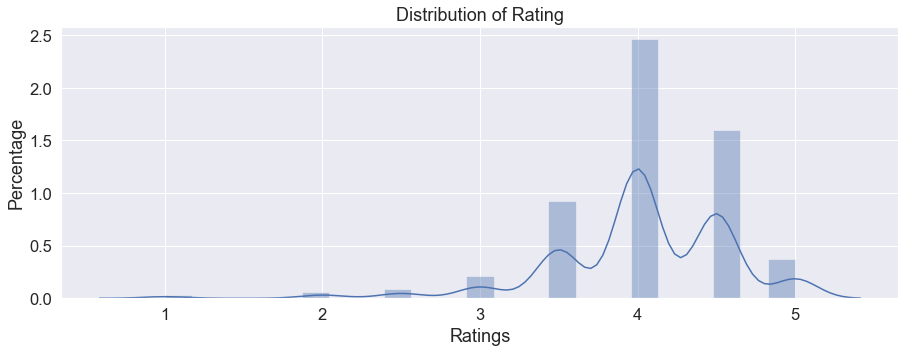

In [14]:
## look at the distribution of ratings
ax = sns.distplot(park_info.rating)
ax.set_title("Distribution of Rating")
ax.set_xlabel('Ratings')
ax.set_ylabel('Percentage')

**Figure.1** We see that there is a trend towards positive reviews since there is a large amount of ratings of 4 and 4.5.

Text(0, 0.5, 'Percentage')

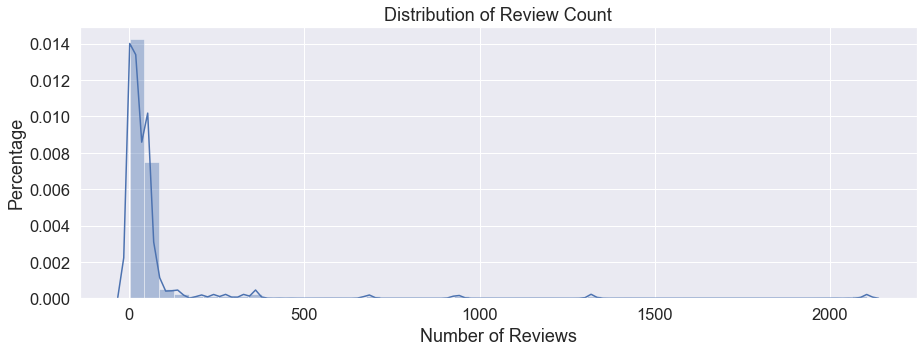

In [15]:
## look at the distribution of review counts
ax = sns.distplot(park_info.review_count)
ax.set_title("Distribution of Review Count")
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Percentage')

**Figure.2** The histogram for review counts has a massive frequency of parks with low review counts. Majority of the SD parks have little reviews with the outliers being the famous parks and tourist attractions. These parks with little reviews may represent the local state parks because of low popularity.

Text(0, 0.5, 'Percentage')

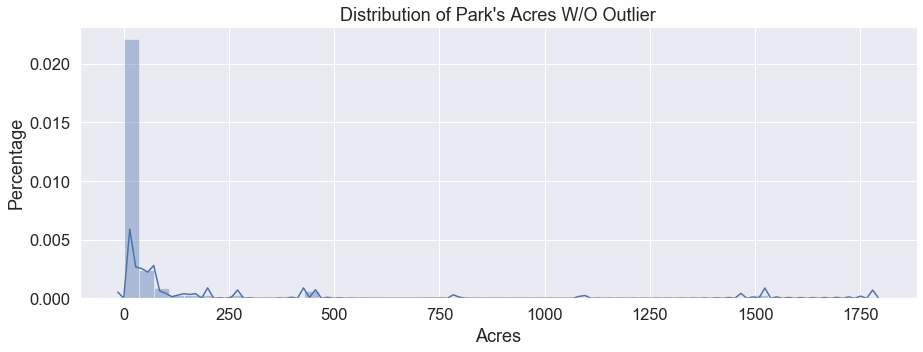

In [16]:
## take out the max outlier to take a better look of the histogram
park_info_no_out = park_info[(park_info['acres'] < 4000)]
ax = sns.distplot(park_info_no_out.acres)
ax.set_title("Distribution of Park's Acres W/O Outlier")
ax.set_xlabel('Acres')
ax.set_ylabel('Percentage')

**Figure.3** Even when I look at the histogram of all the parks without the outlier, there is a huge discrepancy between the acres of the parks. There are an overwhelming amount of parks with less than 10 acres which represent the small local parks in SD.

When I group the data by the park types, there is an interesting trend that occurs. All the parks where the higher government, like San Diego County, are in charge of have higher ratings and higher review counts. These are the parks where San Diego do want to attract out of city visitors and tourists, so it would make sense that their popularities are higher than the local city-owned parks. 

In [17]:
## park type grouped
park_info.groupby('park_type').mean().round(decimals = 2)

,rating,review_count,acres
park_type,,,
Local,3.96,33.28,20.75
National,4.50,681.00,153.28
Open Space,4.03,43.81,50.09
Other,4.50,60.00,43.34
Regional,4.55,384.91,941.71
State,4.08,123.33,438.85


### Scatterplot/Regression Line
Since the data is so skewed, I will log trasform the data to help make observations and assumptions. This will make it reduce the variability of data and turn it into a more "normal" data. As a result, the numbers that we will see in the log transformed data will show relative percent change instead of absolute number change.

In [18]:
## log trasnsform all the variables
park_info['log_rating'] = np.log10(park_info.rating)
park_info['log_review_count'] = np.log10(park_info.review_count)
park_info['log_acres'] = np.log10(park_info.acres)

Text(0, 0.5, 'log(Rating)')

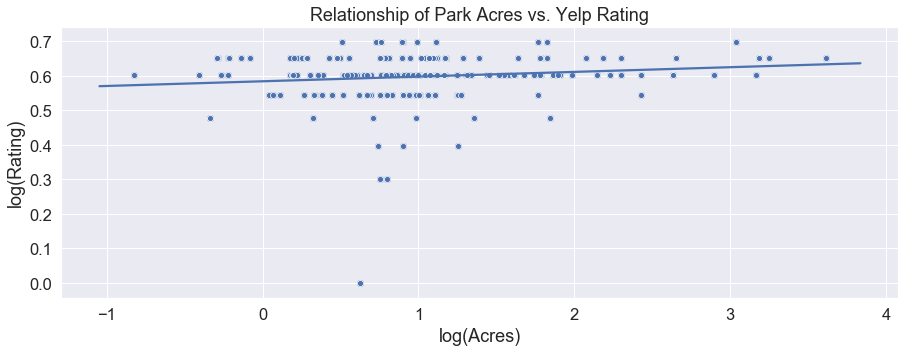

In [30]:
sns.regplot(data=park_info, x = "log_acres", y = "log_rating", ci = None)
ax = sns.scatterplot(x='log_acres', y='log_rating', data=park_info)
ax.set_title('Relationship of Park Acres vs. Yelp Rating')
ax.set_xlabel('log(Acres)')
ax.set_ylabel('log(Rating)')

**Figure.4** The scatterplot shows a slight positive correlation of rating to acres. That means that parks with more acres may have higher Yelp ratings.

In [20]:
outcome, predictors = patsy.dmatrices('log_rating ~ log_acres', park_info)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_rating   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.458
Date:                Wed, 16 Dec 2020   Prob (F-statistic):             0.0645
Time:                        21:49:00   Log-Likelihood:                 214.43
No. Observations:                 187   AIC:                            -424.9
Df Residuals:                     185   BIC:                            -418.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5845      0.010     61.359      0.0

**Figure.5** From the OLS regression results, we see that it is in the range where the relationship is significant if we choose alpha to be 0.1, but not alpha = 0.05. It may be because that the correlation of the variables is very weak and R-squared is very low.

Text(0, 0.5, 'log(Review Count)')

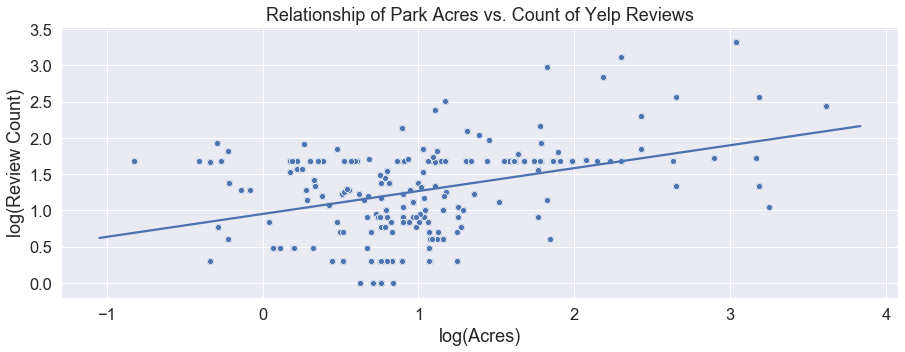

In [21]:
sns.regplot(data=park_info, x = "log_acres", y = "log_review_count", ci = None)
ax = sns.scatterplot(x='log_acres', y='log_review_count', data=park_info)
ax.set_title('Relationship of Park Acres vs. Count of Yelp Reviews')
ax.set_xlabel('log(Acres)')
ax.set_ylabel('log(Review Count)')

**Figure.6** The scatterplot shows a strong positive correlation of number of review counts to acres. That means that parks with more acres may have a higher number Yelp reviews.

In [22]:
outcome, predictors = patsy.dmatrices('log_review_count ~ log_acres', park_info)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       log_review_count   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     34.38
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           2.05e-08
Time:                        21:49:01   Log-Likelihood:                -158.80
No. Observations:                 187   AIC:                             321.6
Df Residuals:                     185   BIC:                             328.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9514      0.070     13.572      0.0

**Figure.7** We see that the OLS Regression Results does show a significant relationship of park acres to Yelp review count because P-value is very close to 0. The correlation between the variables is moderately positive and R-squared is slightly low.

### Wordclouds/Word Frequencies
I wanted to take a look at the words that appear more frequently in these park reviews. 

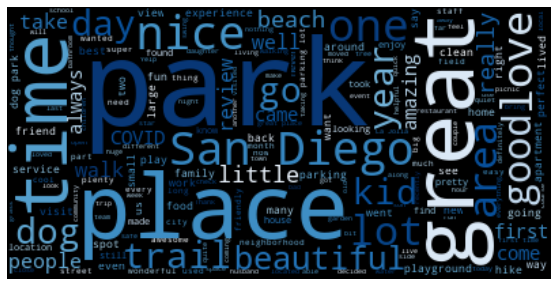

In [23]:
# Create stopword list:
stopwords = set(STOPWORDS)
textt = " ".join(review for review in reviews.text)
wordcloud = WordCloud(stopwords=stopwords,colormap="Blues").generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Figure.8** From all the reviews together, the words that appear more frequently are the words that are bigger. In this wordcloud, we see words like: 'great', 'beautiful', 'nice', etc. Therefore, majority of the reviews seem to be positive

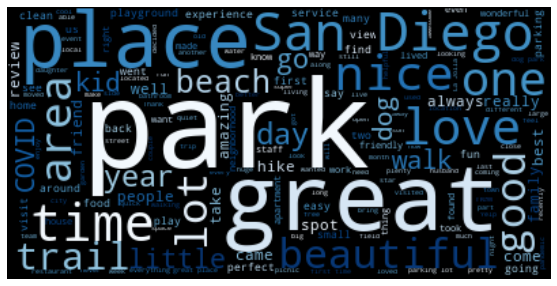

In [24]:
# Create stopword list:
stopwords = set(STOPWORDS)
textt = " ".join(review for review in pos_reviews.text)
wordcloud = WordCloud(stopwords=stopwords, colormap="Blues").generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Figure.9** We do see the same positive words that occur in the wordcloud of all the reviews. Some words do seem larger because we are only taking the reviews that have 4 or 5 stars.

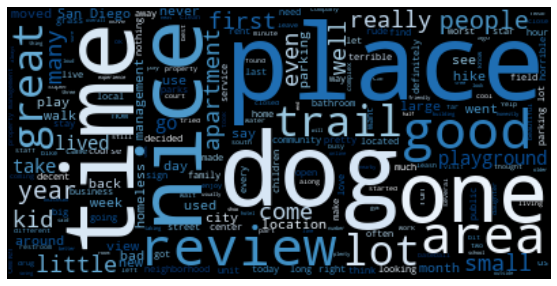

In [25]:
stopwords = set(STOPWORDS)
stopwords.update(["park", "href"])
textt = " ".join(review for review in neg_reviews.text)
wordcloud = WordCloud(stopwords=stopwords, colormap="Blues").generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Figure.10** Now we start seeing different negative words that pop up in the figure. It is interesting to see some of the same words in this wordcloud and the positive reviews wordcloud. 

Let's take a 
closer look at the actual frequency of each word in the positive and negative reviews.

In [26]:
## percentage of pos and neg reviews
print(pos_reviews.size / reviews.size)
print(neg_reviews.size / reviews.size)

0.8036862408915559
0.19631375910844406


Text(0.5, 0, 'Words')

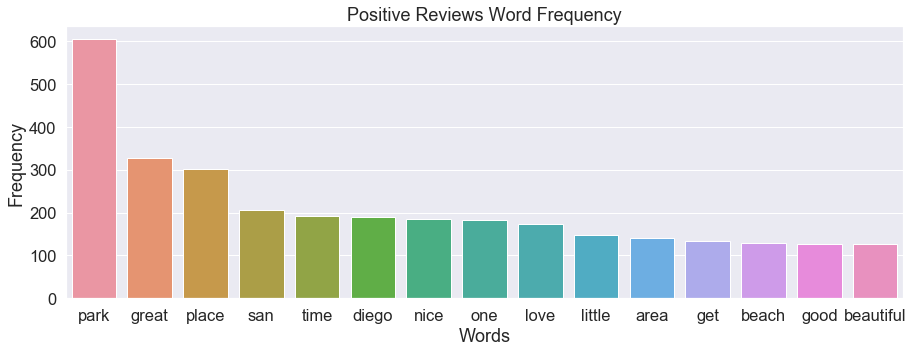

In [27]:
## make a dataframe of the two frequency distributions
pos_words = pd.DataFrame(pos_freqdist.items(), columns = ["Word", "Frequency"])
pos_words = pos_words.sort_values(by = "Frequency", ascending = False).head(15)

neg_words = pd.DataFrame(neg_freqdist.items(), columns = ["Word", "Frequency"]).sort_values(by = "Frequency", ascending = False)
neg_words = neg_words.sort_values(by = "Frequency", ascending = False).head(15)

ax = sns.barplot(x = "Word", y = "Frequency", data = pos_words)
ax.set_title('Positive Reviews Word Frequency')
ax.set_xlabel('Words')

**Figure.11** The top 15 frequented words in the positive reviews

Text(0.5, 0, 'Words')

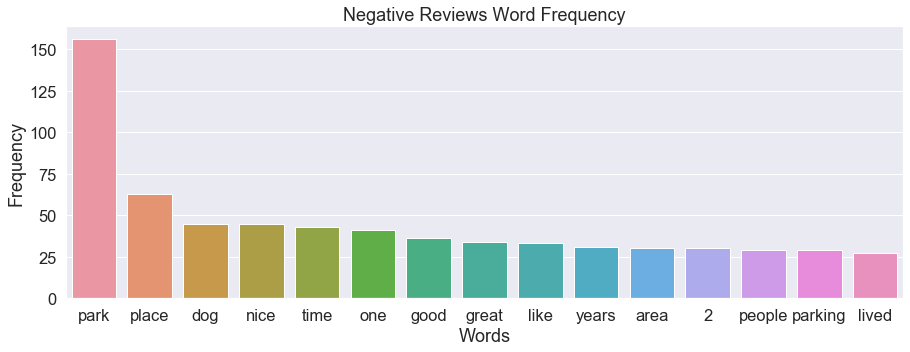

In [28]:
ax = sns.barplot(x = "Word", y = "Frequency", data = neg_words)
ax.set_title('Negative Reviews Word Frequency')
ax.set_xlabel('Words')

**Figure.12** The top 15 frequented words in the negative reviews

There is a lot of overlap between the postive and negative reviews, so it most likely means that the majority of the negative reviews still had positive words and a postive sentiment.

# Ethics & Privacy

The ethical concerns of this project may include the mishandling of information from the parks and the public information from Yelp reviewers. There might be reviewers who do not want their data taken at all, so I will try my best to conform to any reviewer's request. Even though the data is released to the public, it is best that I remove any data from anyone that does not want it here.

There might be unintended consequences that arise from this project, which might affect the public opinion of different public parks. If any place wants their information to be removed, then I will take their data out of our project and analysis.

The data about public parks or state parks are public information from the city government, so it would not bring up concern to any citizen. For data that has any personally identifiable information, all information that lead back to anybody's identity was removed.

My project's goal is to ultimately understand the popularity surrounding public parks by seeing trends in Yelp reviews and the area of these public parks ,so I do not want to harm anyone's feelings or opinions.

# Conclusion & Discussion

It is clear that there is a big discrepancy between San Diego parks that are funded and advertised by the San Diego City versus local public parks meant for neighbor hood cities. The regional and national parks attract much more people like tourists or visiting citizens. As more and more people visit these parks, they are most likely to receive better ratings and more reviews. Most of these parks are very large such as Balboa Park with over 1089 acres of land which will keep expanding every year. Local city parks are not built to compete with the regional and state parks because they do not have the attractions to expand their popularity. From my regression analysis, there is a trend that for every acre of land, we expect that the park will have a 37% increase in number of Yelp reviews. That means that parks with more space are inviting to more people and more crowds.

Looking at the actual text reviews of each park, there was an overwhelming number of positive reviews. In the data provided, 80% of the reviews were a rating of 3.5 to 5 stars while the other 20% of the reviews were a rating of 1 to 3 stars. It seems that the negative reviews often added positive parts of their experience after writing their negative parts because there is a big overlap of words with the positive reviews. What we do see is that the postive responses mentioned more about the view with words like: "great", "San Diego", "beautiful", "beach", but the negative responses mentioned more about their experience with words like: "time", "dogs", "parking", "years".

Since the data only contains limited parks in the San Diego area, my conclusion may not apply to the general public. There were a max of three reviews per park, so I did not have the full data to really conclude what people have to say about the San Diego parks. Although this report contains very famous parks, it is still interesting to compare them to the smaller local parks since we often do not think about them. Hopefully in the future, cities and local governments are able to afford upgrades to the local parks, so these parks can gain attraction from neighborhood residents and increase their popularity.